In [52]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib import rcParams

In [53]:
sc = StandardScaler()

In [54]:
le = LabelEncoder()

In [55]:
df= pd.read_csv('heart.csv')

In [56]:
df = df.head(918)

In [57]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

<AxesSubplot:>

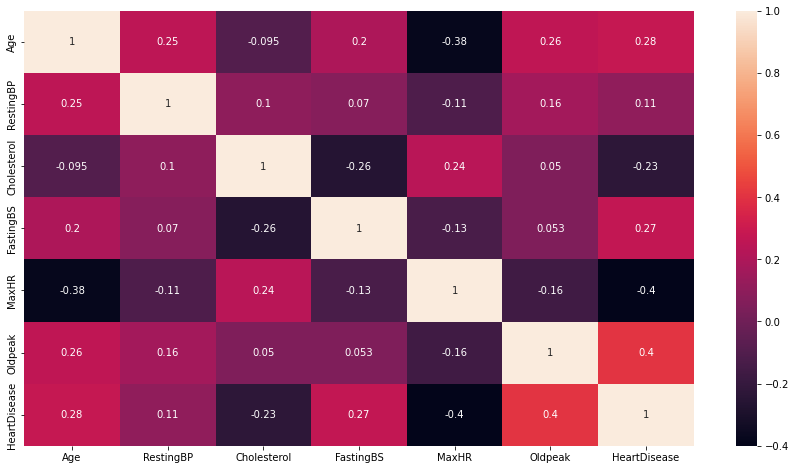

In [13]:
rcParams['figure.figsize'] = 15,8
sns.heatmap(df.corr(), annot = True)
# 1 signifies that a feature is fully correlated with itself and lower the number lower the correlation.

<AxesSubplot:>

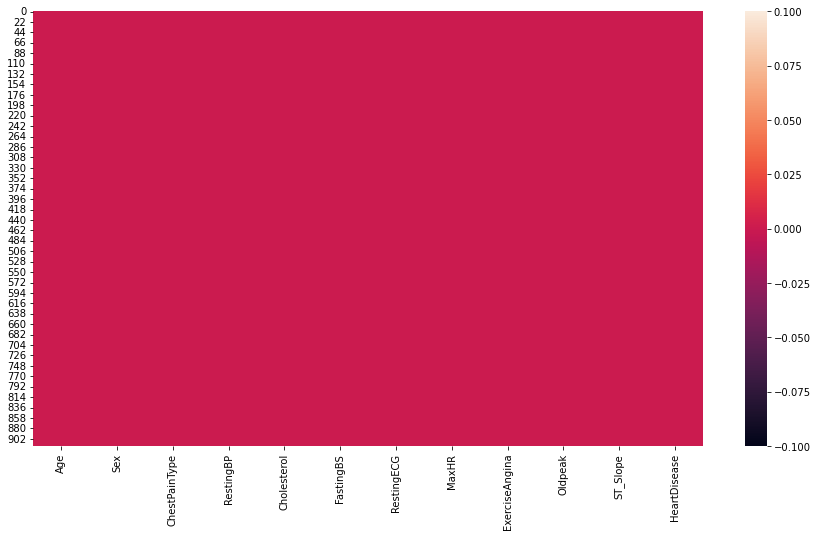

In [14]:
sns.heatmap(df.isnull()) # to check the null areas in dset.

In [15]:
X = df[['Age', 'Sex','ChestPainType', 'RestingBP' ,'Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]

In [16]:
X.shape

(918, 11)

In [17]:
y=df['HeartDisease']

/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

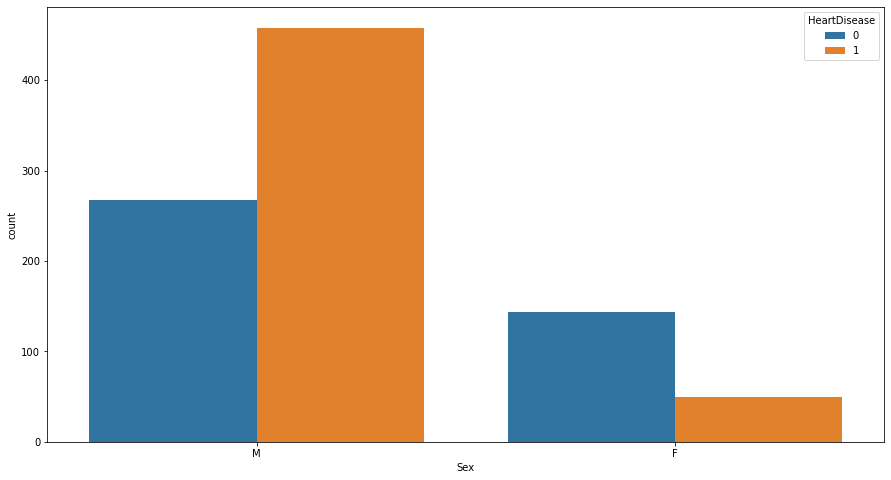

In [18]:
sns.countplot(X['Sex'], hue = y) 
#girls(0) in the dataset have low chances of having disease an boys have more as it can be identified by graphs so it is valid feature.

/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

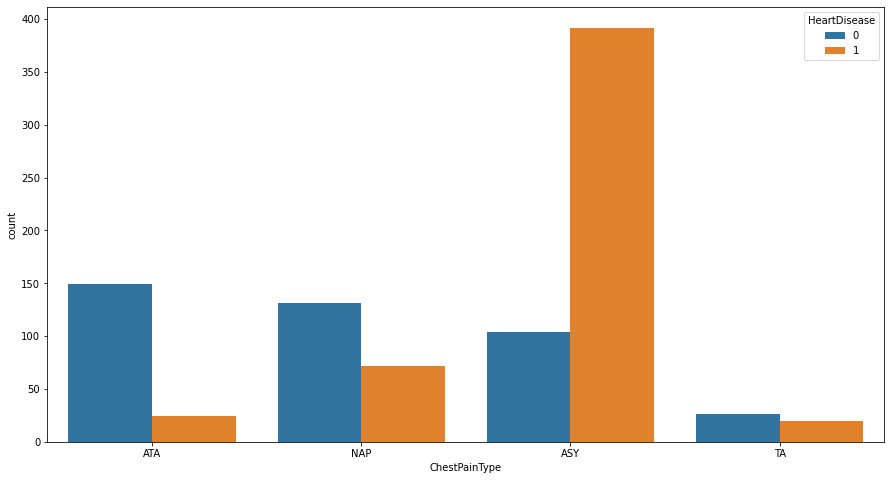

In [19]:
sns.countplot(df['ChestPainType'], hue = df['HeartDisease']) 
#we can see that TA and NAP are not that helpful features so we can remove them after making columns.

In [20]:
cp = X['ChestPainType']

In [21]:
 ChestPainType =pd.get_dummies(cp)

In [22]:
Sex = le.fit_transform(X['Sex'])

In [23]:
Slope = le.fit_transform(X['ST_Slope'])

In [24]:
ExerciseAngina= le.fit_transform(X['ExerciseAngina'])

In [25]:
cp.shape

(918,)

In [26]:
X['Sex']= Sex
X['ST_Slope'] = Slope
X['ExerciseAngina']= ExerciseAngina

/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_15382/513119080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex']= Sex
/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_15382/513119080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ST_Slope'] = Slope
/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_15382/513119080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [27]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

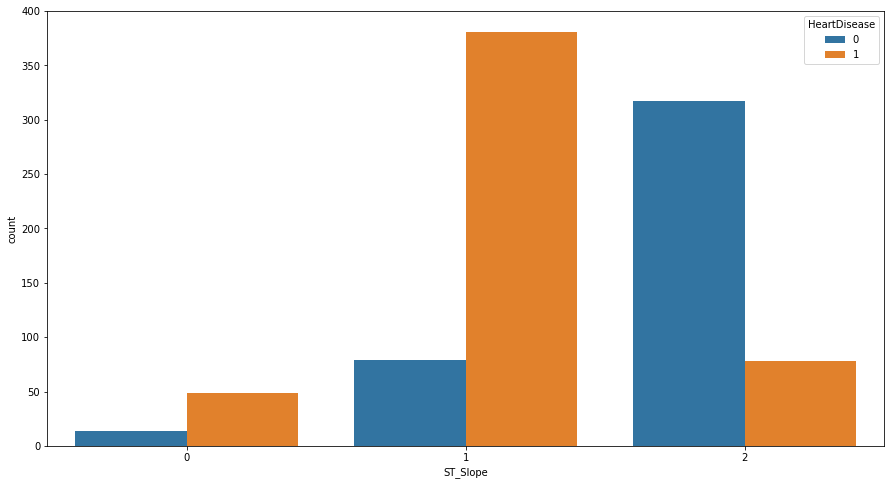

In [28]:
sns.countplot(X['ST_Slope'], hue = y) 

hence above in X , ST_Slope also plays a major role in identifying heart disease so this is also a valid feature.

In [29]:
recg = le.fit_transform(X['RestingECG'])

In [30]:
recg.dtype

dtype('int64')

In [31]:
recg= recg.reshape(-1,1)

In [32]:
RestingECG = recg

In [33]:
X['RestingECG']= RestingECG

/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_15382/2875455816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RestingECG']= RestingECG


In [34]:
sns.set()

In [35]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,ATA,140,289,0,1,172,0,0.0,2
1,49,0,NAP,160,180,0,1,156,0,1.0,1
2,37,1,ATA,130,283,0,2,98,0,0.0,2
3,48,0,ASY,138,214,0,1,108,1,1.5,1
4,54,1,NAP,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,1,132,0,1.2,1
914,68,1,ASY,144,193,1,1,141,0,3.4,1
915,57,1,ASY,130,131,0,1,115,1,1.2,1
916,57,0,ATA,130,236,0,0,174,0,0.0,1


In [36]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,ATA,140,289,0,1,172,0,0.0,2
1,49,0,NAP,160,180,0,1,156,0,1.0,1
2,37,1,ATA,130,283,0,2,98,0,0.0,2
3,48,0,ASY,138,214,0,1,108,1,1.5,1
4,54,1,NAP,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,1,132,0,1.2,1
914,68,1,ASY,144,193,1,1,141,0,3.4,1
915,57,1,ASY,130,131,0,1,115,1,1.2,1
916,57,0,ATA,130,236,0,0,174,0,0.0,1


In [37]:
X = pd.concat([X ,ChestPainType], True )

/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_15382/2640749356.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X = pd.concat([X ,ChestPainType], True )


In [38]:
X= X.drop('ChestPainType' , True)

/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_15382/3742954852.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= X.drop('ChestPainType' , True)


In [39]:
X= X.drop('TA', axis = 1)

In [40]:
X= X.drop('NAP', axis = 1)

In [41]:
xTrain,xTest,yTrain,yTest = train_test_split(X,y , test_size = 0.30)

In [42]:
xTrain = sc.fit_transform(xTrain)

In [43]:
model = KNeighborsClassifier(n_neighbors= 5)

In [44]:
model.fit(xTrain,yTrain)

KNeighborsClassifier()

In [45]:
xTest = sc.fit_transform(xTest)

In [50]:
yPred = model.predict(xTest)

In [51]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ASY,ATA
0,40,1,140,289,0,1,172,0,0.0,2,0,1
1,49,0,160,180,0,1,156,0,1.0,1,0,0
2,37,1,130,283,0,2,98,0,0.0,2,0,1
3,48,0,138,214,0,1,108,1,1.5,1,1,0
4,54,1,150,195,0,1,122,0,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,1,132,0,1.2,1,0,0
914,68,1,144,193,1,1,141,0,3.4,1,1,0
915,57,1,130,131,0,1,115,1,1.2,1,1,0
916,57,0,130,236,0,0,174,0,0.0,1,0,1


In [47]:
yPred.size

276

In [48]:
metrics.mean_absolute_error(yTest, yPred) 
#to be minimized . last : 0.31( without scaling ) 0.15(with scaling) 
# without dummies of chest pain 17 and with dummies 10

0.12681159420289856

In [49]:
yPred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [49]:
accuracy_score(yPred, yTest)

0.894927536231884

In [50]:
yTest.value_counts()

1    158
0    118
Name: HeartDisease, dtype: int64

Text(0, 0.5, 'RestingBP')

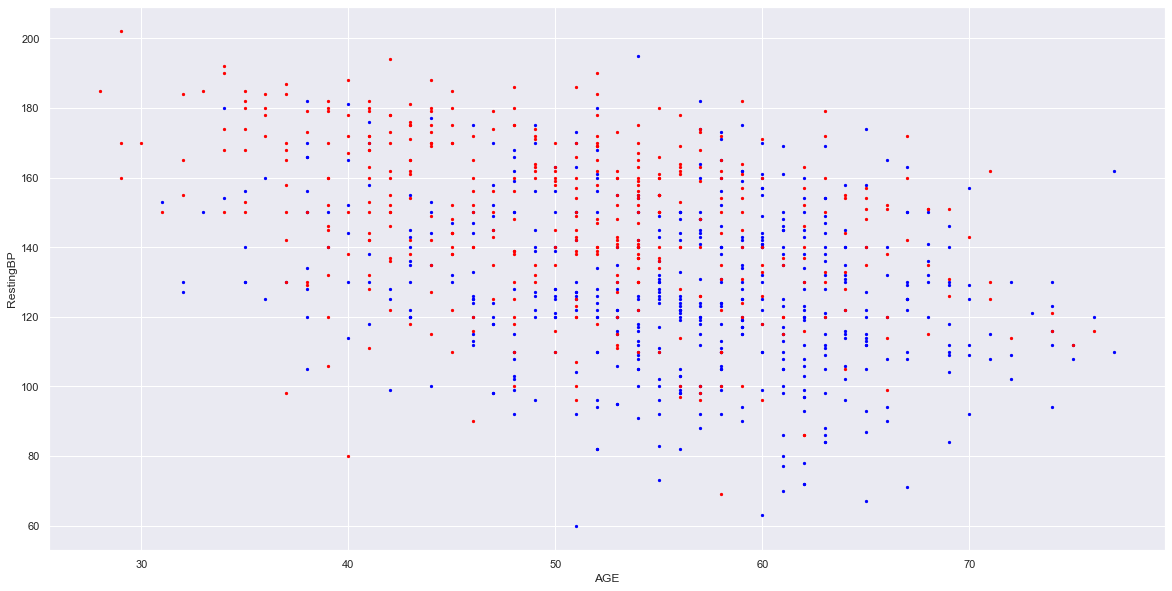

In [51]:
plt.figure(figsize = (20,10))
plt.scatter(X.Age[y==1] , X.MaxHR[y==1], s=5, c='blue' )
plt.scatter(X.Age[y==0] , X.MaxHR[y==0], s=5,c='red')

plt.xlabel('AGE')
plt.ylabel('RestingBP')

In above diagram we can see that blue are the ones with diseases and red are not.

In [ ]:
#from sklearn.neighbors import kneighbors_graph
#A = kneighbors_graph(X, 2, mode='connectivity', include_self=True)

In [52]:
confusion_matrix(yPred,yTest) 
#88 Model predicted Right. TP
#28: Model predicted 1 but the test value is 0. FN
#25: Model predicted 0 but the test value is 1. FP
#135: Neither model predicted 0 nor test values are 0. TN

array([[104,  15],
       [ 14, 143]])

after  graphically feature selection, we can see the difference between the prev result and current result. 